In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('/Users/robertwrobel/Code/Python4Statistics/Notebooks/housing.csv')

In [6]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1330000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,1225000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,1225000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,1221500,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,1141000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


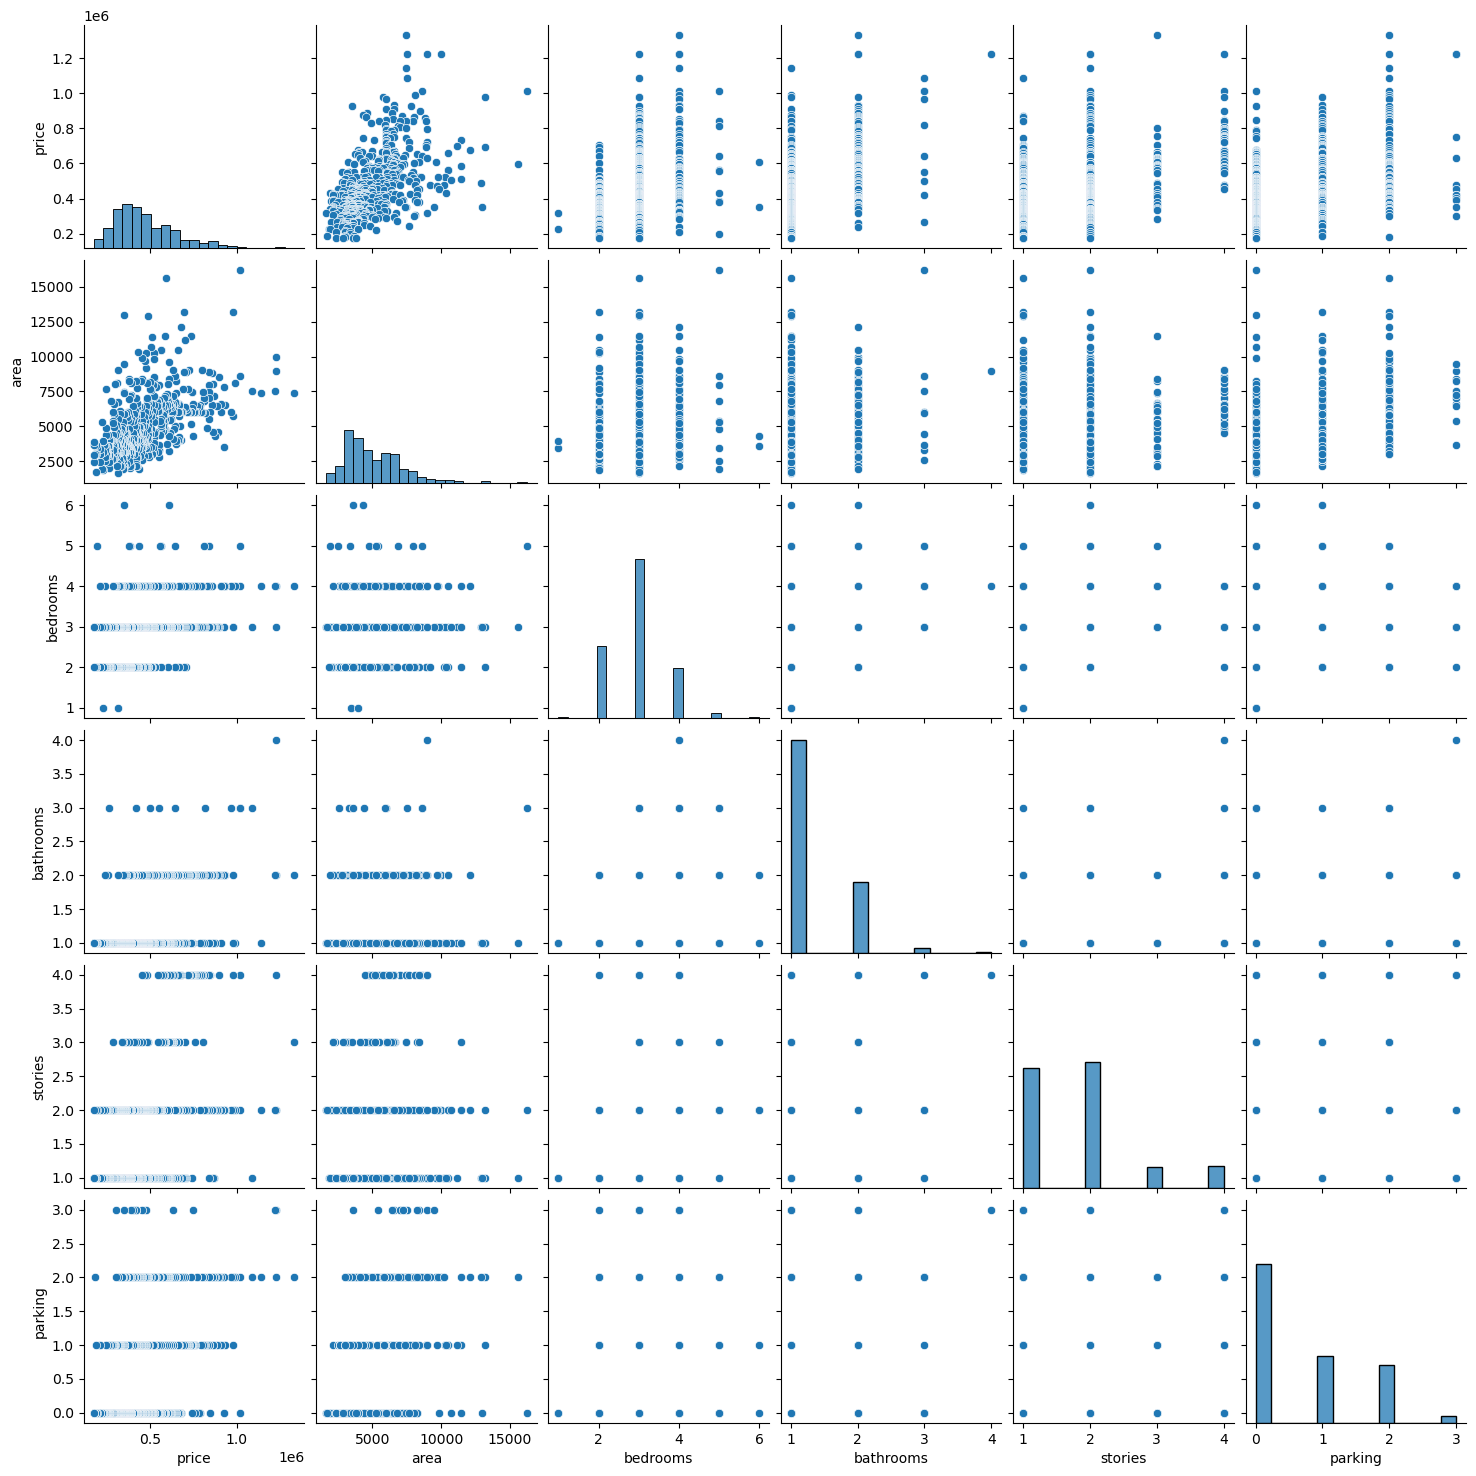

In [7]:
sns.pairplot(df)

In [8]:
model1 = sm.OLS.from_formula('price ~ area', df)
results1 = model1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     218.9
Date:                Wed, 19 Jul 2023   Prob (F-statistic):           7.39e-42
Time:                        16:21:36   Log-Likelihood:                -7296.3
No. Observations:                 545   AIC:                         1.460e+04
Df Residuals:                     543   BIC:                         1.461e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.387e+05   1.74e+04     13.681      0.000    2.04e+05    2.73e+05
area          46.1975      3.123     14.795      0.000      40.064      52.331
==============================================================================
Omnibus:                       92.668   Durbin-Watson:                   0.565
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.673
Skew:                           0.954   Prob(JB):                     1.31e-40
Kurtosis:                       5.108   Cond. No.                     1.44e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
#Gather Regression Statistics
rsquared = results1.rsquared
adj_rsquared = results1.rsquared_adj
parameters = results1.params
tvalues = results1.tvalues
pvalues = results1.pvalues
fstat = results1.fvalue
aic = results1.aic
bic = results1.bic
ci = results1.conf_int(alpha=0.01)

In [12]:
#Gather fitted values and residuals
yhat = results1.fittedvalues
e = results1.resid

In [13]:
model2 = sm.OLS.from_formula('price ~ area + bedrooms + bathrooms', df)
results2 = model2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     171.3
Date:                Wed, 19 Jul 2023   Prob (F-statistic):           4.80e-78
Time:                        16:22:08   Log-Likelihood:                -7206.7
No. Observations:                 545   AIC:                         1.442e+04
Df Residuals:                     541   BIC:                         1.444e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.732e+04   2.65e+04     -0.655      0.513   -6.93e+04    3.47e+04
area          37.8763      2.716     13.948      0.000      32.542      43.211
bedrooms    4.068e+04   8445.788      4.817      0.000    2.41e+04    5.73e+04
bathrooms   1.386e+05   1.25e+04     11.089      0.000    1.14e+05    1.63e+05
==============================================================================
Omnibus:                       70.408   Durbin-Watson:                   0.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.930
Skew:                           0.738   Prob(JB):                     9.19e-32
Kurtosis:                       5.029   Cond. No.                     2.64e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.64e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
#Recode categorical variables as binary
df = pd.get_dummies(df, drop_first=True)
df.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,1330000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,1225000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,1225000,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,1221500,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,1141000,7420,4,1,2,2,1,1,1,0,1,0,0,0


In [15]:
model3 = sm.OLS.from_formula('price ~ area + bedrooms + bathrooms + parking + basement_yes + mainroad_yes + guestroom_yes', df)
results3 = model3.fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     94.72
Date:                Wed, 19 Jul 2023   Prob (F-statistic):           1.41e-89
Time:                        16:22:15   Log-Likelihood:                -7169.5
No. Observations:                 545   AIC:                         1.436e+04
Df Residuals:                     537   BIC:                         1.439e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -5.85e+04   2.76e+04     -2.121      0.034   -1.13e+05   -4313.182
area             28.7928      2.790     10.318      0.000      23.311      34.274
bedrooms       3.894e+04   7962.292      4.891      0.000    2.33e+04    5.46e+04
bathrooms      1.275e+05   1.18e+04     10.783      0.000    1.04e+05    1.51e+05
parking        3.196e+04   6813.020      4.690      0.000    1.86e+04    4.53e+04
basement_yes   2.612e+04   1.22e+04      2.136      0.033    2093.418    5.02e+04
mainroad_yes   7.758e+04   1.64e+04      4.743      0.000    4.55e+04     1.1e+05
guestroom_yes  5.339e+04   1.54e+04      3.466      0.001    2.31e+04    8.36e+04
==============================================================================
Omnibus:                       60.152   Durbin-Watson:                   1.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.082
Skew:                           0.625   Prob(JB):                     1.54e-28
Kurtosis:                       5.019   Cond. No.                     3.03e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


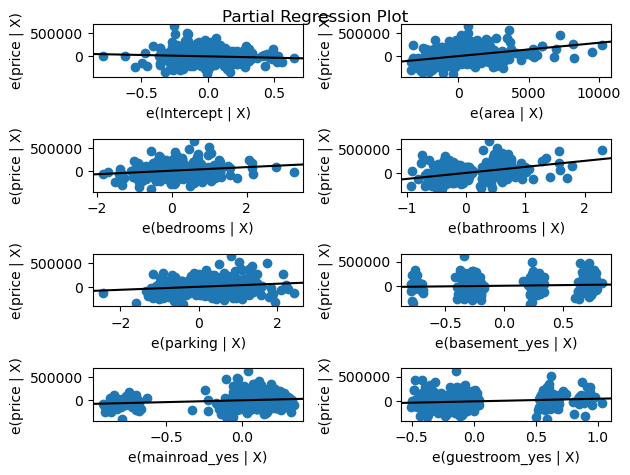

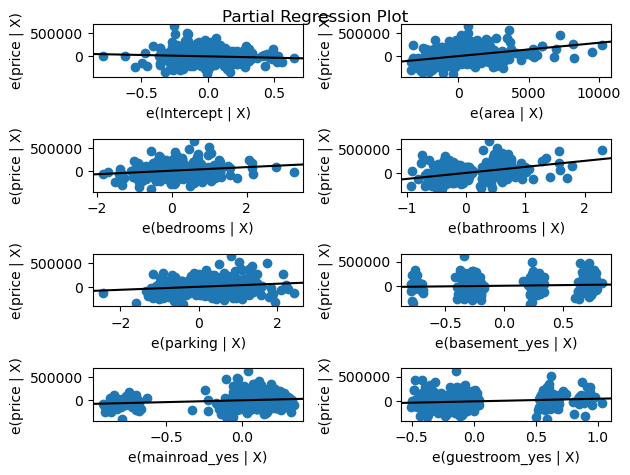

In [17]:
sm.graphics.plot_partregress_grid(results3)


In [24]:
model3 = sm.OLS.from_formula('price ~ area + bedrooms + bathrooms + basement_yes', df)
results3 = model3.fit()
predictions = pd.DataFrame({'bedrooms': [1, 2, 3, 4, 5],
                            'bathrooms': [1, 2, 1, 2, 1],
                            'area':[2000,2000,1500,2000,3500],
                            'basement_yes':[1,0,1,0,1]})

predictions['estimated price'] = results3.predict(predictions)
print(predictions)

   bedrooms  bathrooms  area  basement_yes  estimated price
0         1          1  2000             1    272196.422917
1         2          2  2000             0    401695.173941
2         3          1  1500             1    330878.369624
3         4          2  2000             0    479200.928779
4         5          1  3500             1    483679.356988


In [31]:
model3 = sm.OLS.from_formula('price ~ area + bedrooms + bathrooms + basement_yes', df)
results3 = model3.fit()
predictions['estimated price'] = results3.predict(df)

In [39]:
dfx = pd.DataFrame()
dfx['Actual'] = df['price']
dfx['Predicted'] = predictions['estimated price']
dfx['Difference'] = dfx['Predicted'] - dfx['Actual']
dfx['Difference'].sort_values(ascending=True)
#Best deals?

0     -646748.991076
4     -548494.864681
3     -490471.294128
2     -440111.035540
1     -212748.139527
           ...      
540              NaN
541              NaN
542              NaN
543              NaN
544              NaN
Name: Difference, Length: 545, dtype: float64

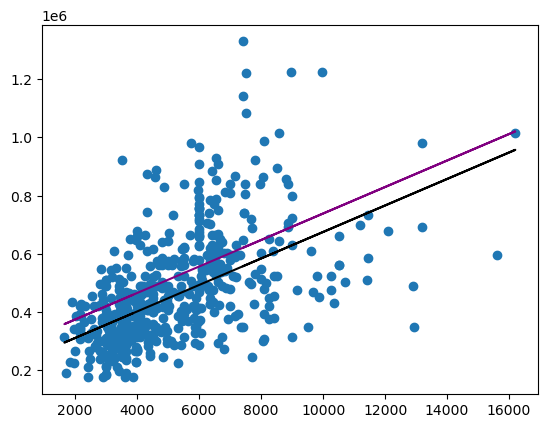

In [71]:
model = sm.OLS.from_formula('price ~ area + basement_yes', data=df).fit()
price = df.price
area = df.area

b0 = model.params[0]
b1 = model.params[1]
b2 = model.params[2]

price_wo_basement = b0 + (b1 * area) + (b2 * 0)
price_w_basement = b0 + (b1 * area) + (b2 * 1)

plt.scatter(area,price)
plt.plot(area, price_wo_basement, color='black')
plt.plot(area, price_w_basement, color='purple')

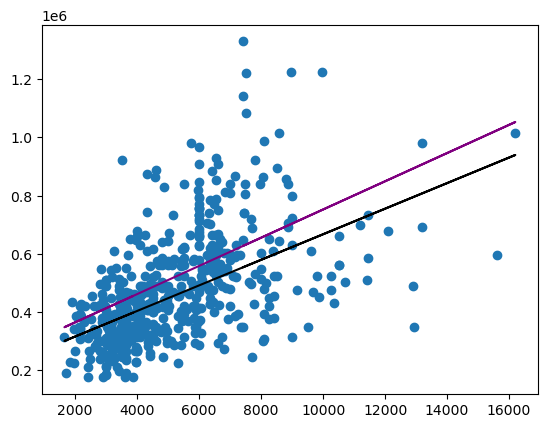

In [81]:
#Categorical interaction term
model = sm.OLS.from_formula('price ~ area + basement_yes + area:basement_yes', data=df).fit()
price = df.price
area = df.area
basement_yes = df.basement_yes
areaXbasement_yes = area * basement_yes

b0 = model.params[0] #intercept
b1 = model.params[1] #area
b2 = model.params[2] #basement_yes
b3 = model.params[3] #interaction


price_wo_basement = b0 + (b1 * area) + (b2 * 0) + (b3 * area * 0)
price_w_basement = b0 + (b1 * area) + (b2 * 1) + (b3 * area * 1)

plt.scatter(area,price)
plt.plot(area, price_wo_basement, color='black')
plt.plot(area, price_w_basement, color='purple')

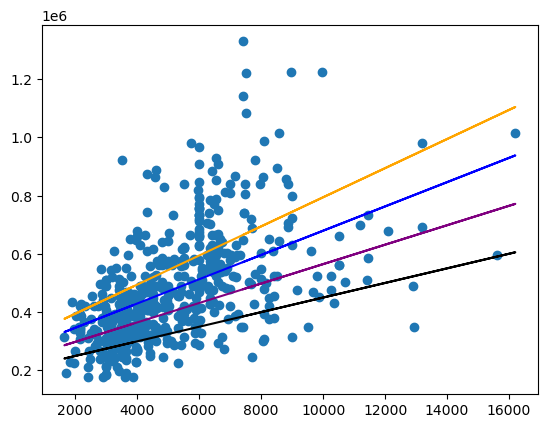

In [80]:
#More interaction
model = sm.OLS.from_formula('price ~ area + bedrooms + area:bedrooms', data=df).fit()
price = df.price
area = df.area
bedrooms = df.bedrooms
areaXbedrooms = area * bedrooms

b0 = model.params[0] #intercept
b1 = model.params[1] #area
b2 = model.params[2] #bedrooms
b3 = model.params[3] #interaction


price_w_1br = b0 + (b1 * area) + (b2 * 1) + (b3 * area * 1)
price_w_2br = b0 + (b1 * area) + (b2 * 2) + (b3 * area * 2)
price_w_3br = b0 + (b1 * area) + (b2 * 3) + (b3 * area * 3)
price_w_4br = b0 + (b1 * area) + (b2 * 4) + (b3 * area * 4)


plt.scatter(area,price)
plt.plot(area, price_w_1br, color='black')
plt.plot(area, price_w_2br, color='purple')
plt.plot(area, price_w_3br, color='blue')
plt.plot(area, price_w_4br, color='orange')

In [82]:
#Comparing models

models = ['model1','model2','model3']
r_squared = [results1.rsquared, results2.rsquared, results3.rsquared]
adj_r_squared = [results1.rsquared_adj, results2.rsquared_adj, results3.rsquared_adj]
aic = [results1.aic, results2.aic, results3.aic]
bic = [results1.bic, results2.bic, results3.bic]

data = {
    'Model': models,
    'R-squared': r_squared,
    'Adjusted R-squared': adj_r_squared,
    'AIC': aic,
    'BIC': bic
}
df_stats = pd.DataFrame(data)

print(df_stats)

    Model  R-squared  Adjusted R-squared           AIC           BIC
0  model1   0.287293            0.285981  14596.676566  14605.278138
1  model2   0.487083            0.484239  14421.395399  14438.598542
2  model3   0.499950            0.496246  14409.548998  14431.052927
